In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
import os
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'


In [3]:
target = 'VDPRIVRRYLLRRQLGQGAYGIVWKAVDRRTGEVVAIKKIFDAFRDKTDAQRTFREITLLQEFGDHPNIISLLDVIRAENDRDIYLVFEFMDTDLNAVIRKGGLLQDVHVRSIFYQLLRATRFLHSGHVVHRDQKPSNVLLDANCTVKLCDFGLARSLGDLPEGP----EDQAVTEYVATRWYRAPEVLLSSHRYTLGVDMWSLGCILGEMLRGRPLFPGTSTLHQLELILETIPPPSEEDLLALGSGCRASVLHQLGSRPRQTLDALLPPDTSPEALDLLRRLLVFAPDKRLSATQALQHPYVQRFHCPSDEWAREADVRPRAHEGVQLSVPEYRSRVYQMILECGGSSGTSREKGPEGVSPSQAHLHKPRADPQLPSRTPVQGPRPRPQSSPGHDPAEHESPRAAKNVPRQNSAPLLQTALLGNGERPPGAKEAPPLTLSLVKPSGRGAAPSLTSQAAAQVANQALIRGDWNRGGGVRVASVQQVPPRLPPEARPGRRMFSTSALQGAQGGARALLGGYSQAYGTVCHSALGHLPLLEGHHV'
metadata_all = ['6v6a.json', '3oz6.json', '8ztc.json']
def parse_qmean(metadata:list):
    qmeans = {}
    
    for metadata in metadata_all:
        with open(os.path.join('metadata', metadata), 'r', encoding='utf-8') as file:
            data = json.load(file)
            chain = list(data['targets'][0]['keyseq_annotation'])[0]
            qmean = data['targets'][0]['keyseq_annotation'][chain]['qmean']
            print(len(qmean))
        key = re.search(r'(.+)\.json', metadata).group(1)
        qmeans[key] = qmean
    return qmeans
qmeans = parse_qmean(metadata_all)

544
544
544


17.830000000000002
16.51
16.73


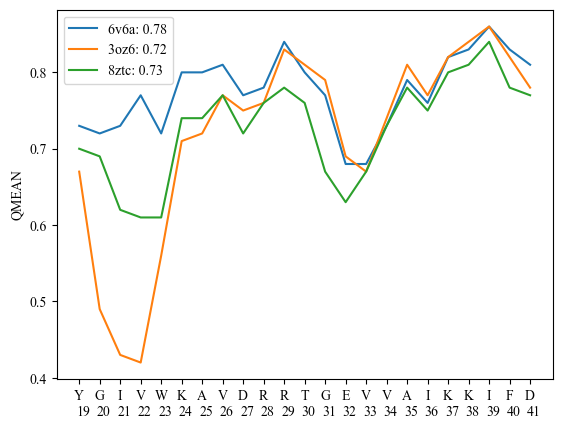

In [4]:
start= 19
stop = 42
def show_qmean(
        qmeans:dict, start:int, stop:int,step:int = 1, 
        resi:bool = True, figname:str = None
):
    for qmean in qmeans:
        auc = sum(qmeans[qmean][start:stop])
        plt.plot(qmeans[qmean][start:stop], label = f'{qmean}: {auc/(stop-start):.2f}')
        print(auc)
    show_seq = target[start: stop: step]
    
    plt.xticks(np.arange(0, stop-start, step),show_seq)

    if resi:
        for i in (np.arange(start, stop, step)):
            plt.text(i-(step/7)-start, 0.35, i)
        
    plt.ylabel('QMEAN')
    plt.legend()
    if figname is None:
        plt.show()
    else:
        plt.savefig(figname, dpi = 600)
    #plt.savefig('test.png')

#show_qmean(qmeans, start, stop, step = 10,figname='qmean12_94.png')
show_qmean(qmeans, start, stop)

58.06
56.79
54.06


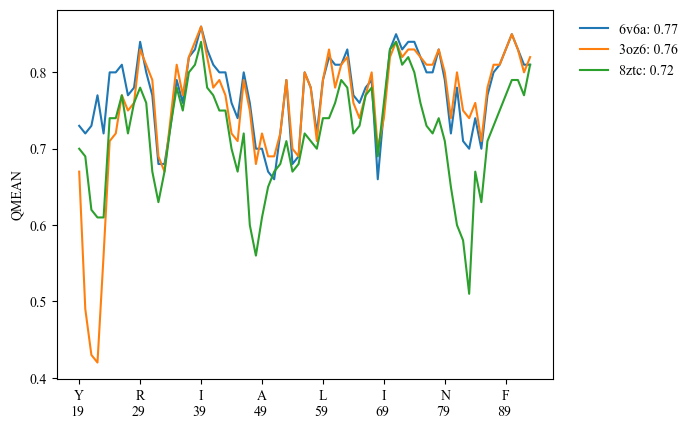

In [11]:
strat, stop, step = 12, 94, 10
for qmean in qmeans:
    auc = sum(qmeans[qmean][start:stop])
    plt.plot(qmeans[qmean][start:stop], label = f'{qmean}: {auc/(stop-start):.2f}')
    print(auc)
show_seq = target[start: stop: step]

plt.xticks(np.arange(0, stop-start, step),show_seq)


for i in (np.arange(start, stop, step)):
    plt.text(i-(step/7)-start, 0.35, i)
    
plt.ylabel('QMEAN')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)
plt.savefig('qmean12_94(1).png', dpi = 600, bbox_inches='tight')

